# Algorithmic Motion Planning (236610)
John Noonan and Eli Shafer<br>
Homework 2<br>
December 2019

### Warmup

Question 1: In a 2-dimensional unit ball (namely, a disk), how much of the volume is located at most 0.1 units from the surface?

**Answer: C Roughly 20%**

Question 2: In a 9-dimensional unit ball, how much of the volume is located at most 0.1 units from the surface?

**Answer: Roughly 60%**

### Exercise

Define the fraction of the volume that is $\epsilon$ distance from the surface of a d-dimensional unit ball as $n_d(\epsilon)$. 

**Plot** $\eta_d(\epsilon)$ as a function of $d$ for $\epsilon = 0.2, 0.1, 0.01$ for $d = 2 ... 10$

![plot_of_volume](img/ex_plot.png)

**Discuss** the implications to reducing the connection radius required for a sampling-based algorithm to maintain asymptotic optimality.

This discussion is related to what we saw in class regarding the proof of probabilistic completeness for the PRM algorithm.  When proving asymptotic optimality for sampling-based algorithms, we typically take the path, cover it with balls where the radius of each ball is proportional to the clearance, and argue that within each ball, with high probability, we will get a sample and can connect two balls which will yield a free path since our connection radius is big enough.  It's important to note that the probabilistic argument depends on the volume of each one of the balls, and the notion of connection is critical because if the connection radius is too small, then there will be points in each ball but we **won't be able to connect them**.  In other words, if the connection radius is reduced too much then points will not be connected, nullifying our conclusions for asymptotic optimality.  On the other hand, if the connection radius is too large, then there will be too many points.  

It is important to note that the majority of points in the high-dimensional situations are located on the surface of the ball, so most edges will be almost the size of the radius. And if the radius is taken to be slightly too large, then the effect of a bit off will be **exponentially more points** since most points lie on the surface area of the ball.  We can see this by the plot of $\eta_d(\epsilon)$ above.  The resultant effect is the algorithm running very slowly.

Therefore, as we discussed in class, there has been a quest to determine the minimal connection radius or minimal expected number of nearest neighbors which are needed to determine certain desirable algorithmic properties.

### A* Implementation

#### Results
Unexplored space: white <br>
Obstacles: black <br>
Path: red <br>
Explored space: violet $\rightarrow$ yellow as $f(n)$ increases 

$f(n) = g(n) + h(n)$ where $g(n)$ is the actual cost to the node and $h(n)$ is the heuristic cost.

| Epsilon| Expanded Nodes | Cost | 
|---| --- | --- |
|$\epsilon=1$| 18283 | 251.45 |
|$\epsilon=10$| 1924| 256.72|
|$\epsilon=20$| 2319| 256.72|

|Figure for $\epsilon=1$ | Figure for $\epsilon=10$ | Figure for $\epsilon = 20$|
|---|---|---|
|![](img/astar_wf_e1v2.png)|![](./img/astar_wf_e10v2.png)|![](./img/astar_wf_e20v2.png)|



#### Discussion

It can be clearly seen in the results that the number of nodes expanded first decreases but then increases again with increasing $\epsilon$.  As a result of increasing $\epsilon$, the optimal path becomes less optimal. It can also be seen that with $\epsilon \gt 1$, the wavefront opens up once the algorithm encounters an obstacle which helps explain the decreasing and then increasing of the number of expanded nodes as $\epsilon$ increases.

### RRT

#### Results for E1 and $p_{bias} = 0.05$

| | Cost | Time (s) | 
|----|----|----|
|Avg | 415.3 | 0.62 |
|Stdev | 93.59 | 1.06 | 


#### Results for E1 and $p_{bias} = 0.2$

| | Cost | Time (s) | 
|----|----|----|
|Avg | 393.46 | 2.11 |
|Stdev | 69.78 | 2.32 | 

#### Results for E2 ($\eta = 5$) and $p_{bias} = 0.05$

| | Cost | Time (s) | 
|----|----|----|
|Avg | 316.13 | 0.41 |
|Stdev | 88.80 | 0.61 | 

#### Results for E2 ($\eta = 5)$ and $p_{bias} = 0.2$

| | Cost | Time (s) | 
|----|----|----|
|Avg | 295.32 | 2.49 |
|Stdev | 40.96 | 4.00 |

| E1 Figures | E2 Figures | 
|------------| ------------------------|
|![](img/rrt_E1_bias_5.png)|![](img/rrt_E2_bias_5.png)|
|![](img/rrt_E1_bias_20.png)|![](img/rrt_E2_bias_20.png)|

### Discussion

As can be seen above, using an extend strategy which has a fixed step-size yields results which have lower cost and lower computation time and higher quality paths.  Therefore, we would employ E2 (the fixed step-size extend strategy) in practice.

### RRT*

|Parameters| Values |
| --- | --- | 
| Times used | 0.1, 0.5, 1.0, 5.0, 7.5, 10.0, 15.0, 20.0 | 
| Number of runs per time | 10 | 
| $\eta$ | 5.0 | 
| $p_{bias}$ | 0.05 | 
| $k = \mathcal{O}(\log{(n)})$ | $1.5e \cdot \log{(n)}$ |
| $k = constant$ | k = 5, 10, 20, 30|

### Results for $k = \mathcal{O}(\log{n})$

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

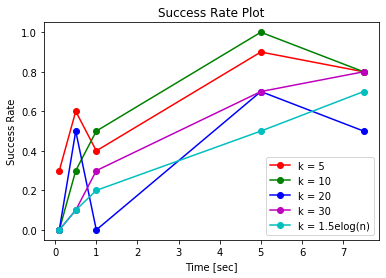

In [3]:
times = np.array([0.1, 0.5, 1.0, 5.0, 7.5])

success_rates_5 = np.array([0.3, 0.6, 0.4, 0.9, 0.8])
success_rates_10 = np.array([0.0, 0.3, 0.5, 1.0, 0.8])
success_rates_20 = np.array([0.0, 0.5, 0.0, 0.7, 0.5])
success_rates_30 = np.array([0.0, 0.1, 0.3, 0.7, 0.8])
success_rates_log = np.array([0.0, 0.1, 0.2, 0.5, 0.7])

plt.figure()
plt.plot(times, success_rates_5, "ro-", label="k = 5")
plt.plot(times, success_rates_10, "go-", label="k = 10")
plt.plot(times, success_rates_20, "bo-", label="k = 20")
plt.plot(times, success_rates_30, "mo-", label="k = 30")
plt.plot(times, success_rates_log, "co-", label="k = 1.5elog(n)")
plt.ylabel("Success Rate")
plt.xlabel("Time [sec]")
plt.title(r"Success Rate Plot")
# plt.set_xticks(np.arange(0,30,5))
plt.legend()
plt.show()




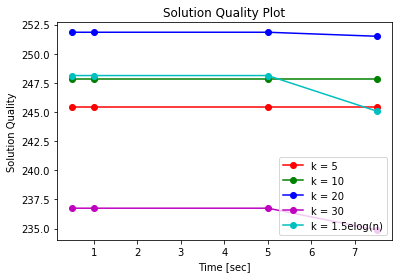

In [4]:
times = np.array([0.1, 0.5, 1.0, 5.0, 7.5])
costs_5 = np.array([None, 245.42323278133907, 245.42323278133907, 245.42323278133907, 245.42323278133907])
costs_10 = np.array([None, 247.86106477268112, 247.86106477268112, 247.86106477268112, 247.86106477268112])
costs_20 = np.array([None, 251.84771996974686, 251.84771996974686, 251.84771996974686, 251.5043493299132])
costs_30 = np.array([None, 236.7495588873198, 236.7495588873198, 236.7495588873198, 234.8853600382933])
costs_log = np.array([None, 248.13228311325054, 248.13228311325054, 248.13228311325054, 245.0846535782386])

plt.plot(times, costs_5, "ro-", label="k = 5")
plt.plot(times, costs_10, "go-", label="k = 10")
plt.plot(times, costs_20, "bo-", label="k = 20")
plt.plot(times, costs_30, "mo-", label="k = 30")
plt.plot(times, costs_log, "co-", label="k = 1.5elog(n)")

plt.ylabel("Solution Quality")
plt.xlabel("Time [sec]")
plt.title(r"Solution Quality Plot")
plt.legend()
plt.show()


